# Cross-validating 1 vs 3 states early in training for best sigma = 1

In [16]:
import os
import re
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# from oneibl.onelight import ONE # only used for downloading data
# import wget
from utils import *
from plotting_utils import *
from analysis_utils import *
import dglm_hmm1
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


ibl_data_path = '../data_IBL'
dfAll = pd.read_csv(ibl_data_path + '/Ibl_processed.csv')
colorsFeatures = [['#FAA61A','indigo','#99CC66','#59C3C3','#9593D9'],['#FAA61A',"#2369BD","#A9373B",'#99CC66','#59C3C3','#9593D9']]
#colorsStates = ['orange','firebrick','forestgreen']#['orange','slateblue','forestgreen'] #['#FAA61A','#59C3C3','#9593D9','#99CC66','indigo'] #['darkorange','darkblue','forestgreen','purple']
colorsStates = ['tab:orange','tab:blue', 'tab:green','tab:red']
myFeatures = [['bias','delta stimulus', 'previous choice', 'previous answer'],['bias','contrast left','contrast right', 'previous choice', 'previous answer']]
sns.set_context("talk")
# colormap = ['rebeccapurple','teal','darkturquoise','springgreen','gold']
# colormap = ['rebeccapurple','royalblue','limegreen','orange']
colormap = ['tab:purple','tab:pink','tab:cyan','yellowgreen']

In [17]:
labChosen =  ['angelakilab','churchlandlab','wittenlab']
subjectsAll = []
for lab in labChosen:
    subjects = np.unique(dfAll[dfAll['lab'] == lab]['subject']).tolist()
    subjectsAll = subjectsAll + subjects

if ('NYU-01' in subjectsAll):
    subjectsAll.remove('NYU-01')
if ('NYU-06' in subjectsAll):
    subjectsAll.remove('NYU-06')
if ('CSHL_007' in subjectsAll):
    subjectsAll.remove('CSHL_007')
if ('CSHL049' in subjectsAll):
    subjectsAll.remove('CSHL049')



In [18]:
# setting hyperparameters
alphaList = [2*(10**x) for x in list(np.arange(-1,6,0.5,dtype=float))] 
L2penaltyW = 1
maxiter = 200
bestSigma = 1 # verified from fitting multiple sigmas
priorDirP = [100,10] # to read dGLMHMM1 model
fit_init_states = False
K = 3
D = 4 # number of features
sessStop = -1 # last session to use in fitting
splitFolds = 5

In [21]:
bestSigmaInd = 7 # equivalent to sigma=1
Kplot = [3] # K for which to plot parameters for each animal

allW = np.empty((len(subjectsAll), 4), dtype=object)
allP = np.empty((len(subjectsAll), 4), dtype=object)

for idx in range(0, len(subjectsAll)):
    subject=subjectsAll[idx]
    x, y, sessInd, correctSide = get_mouse_design(dfAll, subject, sessStop=sessStop, D=D) # NOT LOOKING AT FULL DATASET
    N = x.shape[0]
    presentTrain, presentTest = split_data(N, sessInd, folds=splitFolds, blocks=10, random_state=1)

    for z in range(0,len(Kplot)):
        K = Kplot[z]
        for fold in range(0, splitFolds):
            data = np.load(f'../data_IBL/{subject}/{subject}_ALL-PARAM_D={D}_{K}-state_fold-{fold}_multiple-alphas_L2penaltyW={L2penaltyW}_untilSession{sessStop}.npz')



    # # parameters for best model in dGLM-HMM1 (only weights varying)
    # globalP = np.load(f'../data_IBL/{subject}/{subject}_bestP_D={D}_{K}_state_CV_sigma=1_priorDirP={priorDirP}_L2penaltyW={L2penaltyW}_untilSession{sessStop}.npy')
    # dglmhmmW  = np.load(f'../data_IBL/{subject}/{subject}_bestW_D={D}_{K}_state_CV_sigma=1_priorDirP={priorDirP}_L2penaltyW={L2penaltyW}_untilSession{sessStop}.npy')
    
    # # fitting
    # P, _, W, _, testLl, testAccuracy = fit_eval_CV_multiple_alphas(K, x, y, sessInd, presentTrain[fold], presentTest[fold], alphaList=alphaList, maxiter=maxiter, dglmhmmW=dglmhmmW, globalP=globalP, bestSigma=bestSigma, L2penaltyW=L2penaltyW, fit_init_states=fit_init_states)
  
    # for K in [1,2,3,4]:#,3,4]: #[1,2,3]:

    #     # tempW = []
    #     # tempP = []
    #     data = np.load(f'../data_IBL/{subject}/{subject}_ALL-PARAM_D={D}_{K}-state_multiple-sigmas_priorDirP={priorDirP}_L2penaltyW={L2penaltyW}_untilSession{sessStop}.npz')
    #     print(data['testLl'].shape)

# Cross-validating 1 vs 3 states early in training for best sigma = 1

# Fitting only first 20 sessions (during learning) to check if we get the same sigma and results

In [ ]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# from oneibl.onelight import ONE # only used for downloading data
# import wget
from utils import *
from plotting_utils import *
from analysis_utils import *
import dglm_hmm1
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


ibl_data_path = '../data_IBL'
dfAll = pd.read_csv(ibl_data_path + '/Ibl_processed.csv')
subjectsWitten = np.unique(dfAll[dfAll['lab'] == 'wittenlab']['subject']).tolist()
colorsFeatures = [['#FAA61A','indigo','#99CC66','#59C3C3','#9593D9'],['#FAA61A',"#2369BD","#A9373B",'#99CC66','#59C3C3','#9593D9']]
colorsStates = ['tab:orange','tab:blue', 'tab:green','tab:red'] #['darkorange','darkblue','forestgreen','purple']
myFeatures = [['bias','delta stimulus', 'previous choice', 'previous answer'],['bias','contrast left','contrast right', 'previous choice', 'previous answer']]
sns.set_context("talk")
colormap = ['tab:purple','tab:pink','tab:cyan','yellowgreen']

In [ ]:
labChosen =  ['angelakilab','churchlandlab','wittenlab']
subjectsAll = []
for lab in labChosen:
    subjects = np.unique(dfAll[dfAll['lab'] == lab]['subject']).tolist()
    subjectsAll = subjectsAll + subjects

# removing missing or weird animals
if ('NYU-01' in subjectsAll):
    subjectsAll.remove('NYU-01')
if ('NYU-06' in subjectsAll):
    subjectsAll.remove('NYU-06')
if ('CSHL_007' in subjectsAll):
    subjectsAll.remove('CSHL_007')
if ('CSHL049' in subjectsAll):
    subjectsAll.remove('CSHL049')

In [3]:
# read from cluster array in order to get parallelizations
# setting hyperparameters
sigmaList = [0] + [10**x for x in list(np.arange(-3,1,0.5,dtype=float))] + [10**x for x in list(np.arange(1,4,1,dtype=float))]
L2penaltyW = 1
priorDirP = [100,10] #[10,1]
maxiter = 300
splitFolds = 5

D = 4 # number of features
sessStop = 20 # last session to use in fitting

In [4]:
# NEW SAVING OF FILES AND MORE ANIMALS:
testLlAll = np.zeros((4, len(subjectsAll), len(sigmaList)))
testAccuracyAll = np.zeros((4, len(subjectsAll), len(sigmaList)))
bestTestLl = np.zeros((4, len(subjectsAll)))
bestTestAccuracy = np.zeros((4, len(subjectsAll)))

for idx in range(0, len(subjectsAll)):
    subject = subjectsAll[idx]
    testLl = []
    testAccuracy = []
    avgTestLl = []
    avgTestAccuracy = []
    for K in [1,2,3,4]:
        data = np.load(f'../data_IBL/{subject}/{subject}_ALL-PARAM_D={D}_{K}-state_multiple-sigmas_priorDirP={priorDirP}_L2penaltyW={L2penaltyW}_untilSession{sessStop}.npz')
        # fig, axes = plt.subplots(1,figsize=(20,8), dpi=400)
        # fig.suptitle(f'{subject}')
        # for fold in range(0, splitFolds):
        #     plot_testLl_CV_sigma(data['testLl'][fold], sigmaList=sigmaList, label=f'K={K} fold {fold}', color=colormap[K-1], axes=axes)
        avgTestLl.append(np.mean(data['testLl'],axis=0))
        avgTestAccuracy.append(np.mean(data['testAccuracy'],axis=0))
    avgTestLl = [x - avgTestLl[0][0] for x in avgTestLl] # normalizing to GLM-HMM sigma=0 K=1
    avgTestAccuracy = [x - avgTestAccuracy[0][0] for x in avgTestAccuracy]
    
    for K in [1,2,3,4]:
        testLlAll[K-1][idx] = avgTestLl[K-1]
        testAccuracyAll[K-1][idx] = avgTestAccuracy[K-1]

    bestSigmaInd = 7 # Choosing best sigma index across animals
    for K in [1,2,3,4]:
        bestTestLl[K-1][idx] = avgTestLl[K-1][bestSigmaInd] - avgTestLl[0][bestSigmaInd] # delta
        bestTestAccuracy[K-1][idx] = avgTestAccuracy[K-1][bestSigmaInd] - avgTestAccuracy[0][bestSigmaInd] # delta
    
    # # Plotting delta test ll averaged across folds for per-animal plots
    # fig, axes = plt.subplots(1,figsize=(20,8), dpi=400)
    # fig.suptitle(f'{subject}')
    # fig.tight_layout()
    # for K in range(1,5):
    #     plot_testLl_CV_sigma(avgTestLl[K-1], sigmaList=sigmaList, label=f'K={K}', color=colormap[K-1], axes=axes)
    # axes.set_ylabel("Delta Test Ll (per trial)")


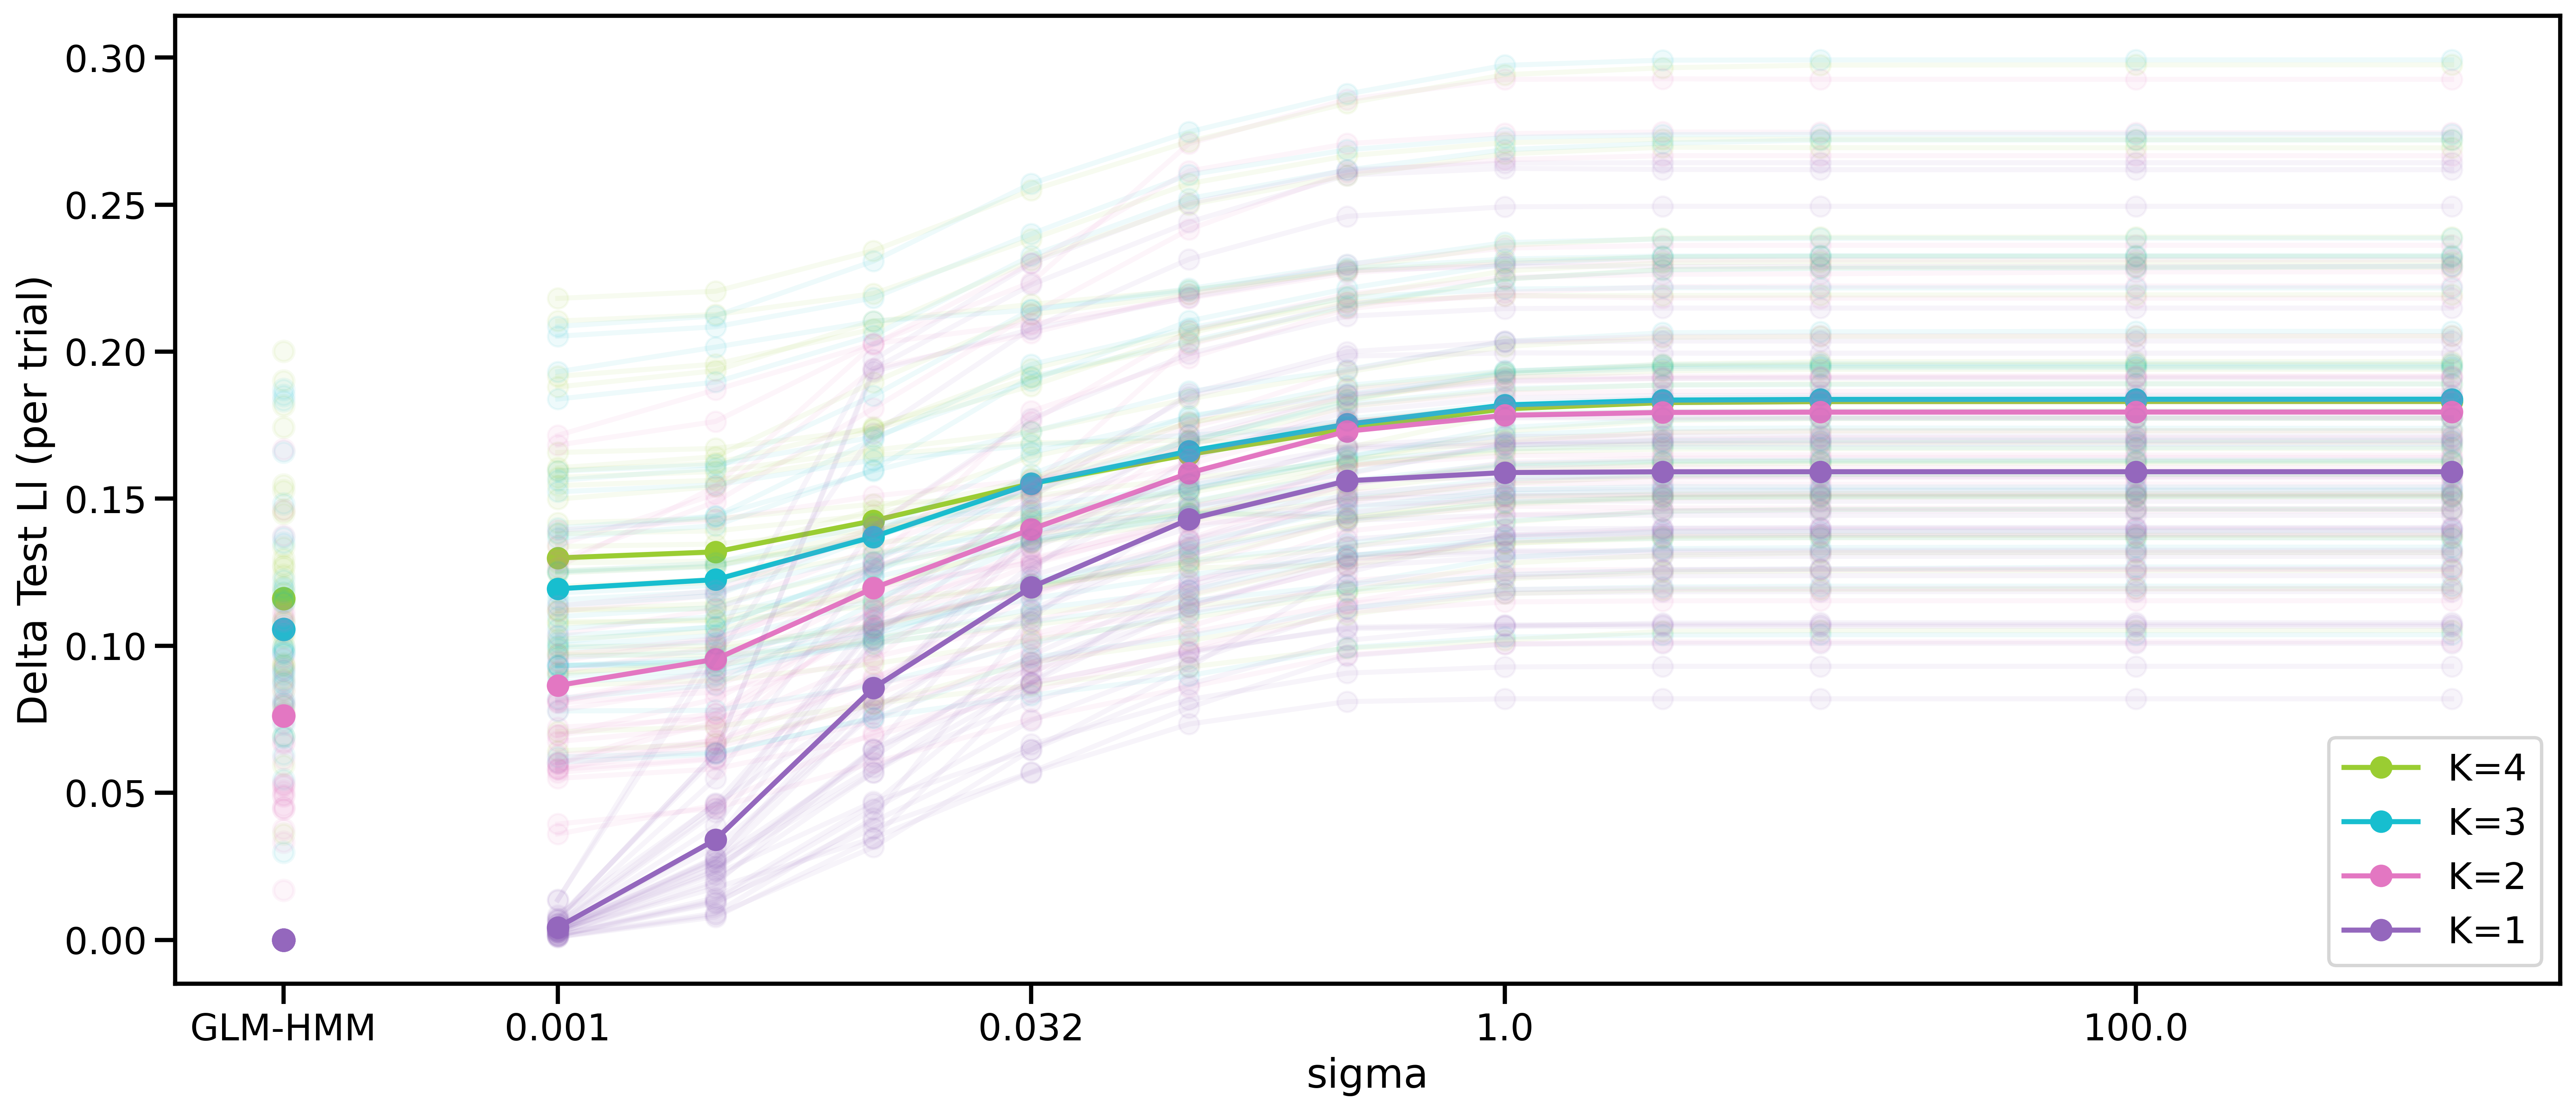

In [5]:
# Plotting one plot with all animals and their mean
fig, axes = plt.subplots(1, figsize = (16,7), dpi=400)
fig.tight_layout()
# axes.set_title('averaged across all animals')
for K in range(4,0,-1):
    for idx in range(0, len(subjectsAll)):
        subject = subjectsAll[idx]
        plot_testLl_CV_sigma(testLlAll[K-1][idx], sigmaList=sigmaList, label=None, color=colormap[K-1], axes=axes, alpha=0.07)

    plot_testLl_CV_sigma(np.mean(testLlAll[K-1], axis=0), sigmaList=sigmaList, label=f'K={K}', color=colormap[K-1], axes=axes, alpha=1)
    axes.set_ylabel("Delta Test Ll (per trial)") # Add Delta
    

Text(11.25, 0.5, 'Delta Test Ll (per trial)')

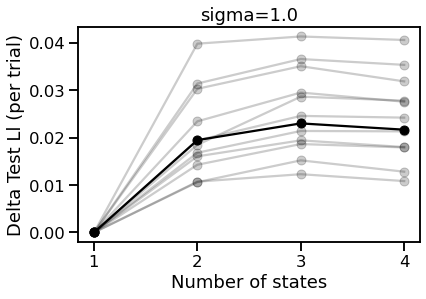

In [8]:
fig, axes = plt.subplots(1,figsize=(6,4))
fig.tight_layout()
for idx in range(0, len(subjectsWitten)):
    axes.plot([1,2,3,4],bestTestLl[:,idx],'-o', color='black',alpha=0.2)
    axes.set_xticks([1,2,3,4])
# plotting mean across all animals
axes.plot([1,2,3,4], np.mean(bestTestLl, axis=1), '-o', color='black',alpha=1)
axes.set_title(f'sigma={np.round(sigmaList[bestSigmaInd],2)}')
axes.set_xlabel('Number of states')
axes.set_ylabel('Delta Test Ll (per trial)')


In [ ]:
# Reading parameters and plotting them at best sigma for 
bestSigmaInd = 7 # equivalent to sigma=1
Kplot = [] # K for which to plot parameters for each animal

allW = np.empty((len(subjectsAll), 4), dtype=object)
allP = np.empty((len(subjectsAll), 4), dtype=object)

for idx in range(0, len(subjectsAll)):
    subject=subjectsAll[idx]
    _, _, sessInd, correctSide = get_mouse_design(dfAll, subject, sessStop=sessStop, D=D)

    for K in [1,2,3,4]:#,3,4]: #[1,2,3]:

        # tempW = []
        # tempP = []
        data = np.load(f'../data_IBL/{subject}/{subject}_ALL-PARAM_D={D}_{K}-state_multiple-sigmas_priorDirP={priorDirP}_L2penaltyW={L2penaltyW}_untilSession{sessStop}.npz')
        
        # for fold in range(0, splitFolds):
        #     tempP.append(data['allP'][fold])
        #     tempW.append(data['allW'][fold])
            
            # # plotting transition matrix individually 
            # fig, axes = plt.subplots()
            # plot_transition_matrix(tempP[fold][bestSigmaInd], sortedStateInd=None) # not sorted

            # # plotting weights for each fold individually
            # fig, axes = plt.subplots(D, 1,figsize=(16,4*D+1), sharex=True)
            # fig.suptitle(f'{subject}: sigma = {np.round(sigmaList[bestSigmaInd],2)} fold {fold}')
            # fig.tight_layout()
            # plotting_weights_per_feature(tempW[fold][bestSigmaInd], sessInd, axes, yLim=[[-2.5,2.5],[-6.2,6.2]], colors=colorsStates, labels=myFeatures[D%2], linewidth=5, linestyle='-', sortedStateInd=None)
        

In [9]:
# Reading parameters and plotting them at best sigma for 
bestSigmaInd = 7 # equivalent to sigma=1
Kplot = [] # K for which to plot parameters for each animal

allW = np.empty((len(subjectsAll), 4), dtype=object)
allP = np.empty((len(subjectsAll), 4), dtype=object)

for idx in range(0, len(subjectsAll)):
    subject=subjectsAll[idx]
    _, _, sessInd, correctSide = get_mouse_design(dfAll, subject, sessStop=sessStop, D=D)

    for K in [1,2,3,4]:#,3,4]: #[1,2,3]:

        # tempW = []
        # tempP = []
        data = np.load(f'../data_IBL/{subject}/{subject}_ALL-PARAM_D={D}_{K}-state_multiple-sigmas_priorDirP={priorDirP}_L2penaltyW={L2penaltyW}_untilSession{sessStop}.npz')
        
        # for fold in range(0, splitFolds):
        #     tempP.append(data['allP'][fold])
        #     tempW.append(data['allW'][fold])
            
            # # plotting transition matrix individually 
            # fig, axes = plt.subplots()
            # plot_transition_matrix(tempP[fold][bestSigmaInd], sortedStateInd=None) # not sorted

            # # plotting weights for each fold individually
            # fig, axes = plt.subplots(D, 1,figsize=(16,4*D+1), sharex=True)
            # fig.suptitle(f'{subject}: sigma = {np.round(sigmaList[bestSigmaInd],2)} fold {fold}')
            # fig.tight_layout()
            # plotting_weights_per_feature(tempW[fold][bestSigmaInd], sessInd, axes, yLim=[[-2.5,2.5],[-6.2,6.2]], colors=colorsStates, labels=myFeatures[D%2], linewidth=5, linestyle='-', sortedStateInd=None)
        

        allP[idx,K-1] = np.mean(data['allP'], axis=0)
        allW[idx,K-1] = np.mean(data['allW'], axis=0)

        if (K in Kplot):
            # plotting transition matrix averaged across folds for best sigma
            fig, axes = plt.subplots()
            # plot_transition_matrix(avgP[K-1][bestSigmaInd], sortedStateInd=None) # not sorted
            plot_transition_matrix(allP[idx,K-1][bestSigmaInd], sortedStateInd=None)
            axes.set_title(subject)

            # plotting weights for each feature separately
            fig, axes = plt.subplots(D, 1,figsize=(16,4*D+1), sharex=True)
            fig.suptitle(f'Weights averaged across 5 folds for {subject}, sigma = {np.round(sigmaList[bestSigmaInd],2)}')
            fig.tight_layout()
            plotting_weights_per_feature(-allW[idx,K-1][0], sessInd, axes, yLim=[[-2.5,2.5],[-0.5,8.2],[-2.5,2.5],[-2.5,2.5]], colors=colorsStates, labels=myFeatures[D%2], linewidth=2, linestyle='--', sortedStateInd=None, legend=False)
            plotting_weights_per_feature(-allW[idx,K-1][bestSigmaInd], sessInd, axes, yLim=[[-2.5,2.5],[-0.5,8.2],[-2.5,2.5],[-2.5,2.5]], colors=colorsStates, labels=myFeatures[D%2], linewidth=5, linestyle='-', sortedStateInd=None)

            ## plotting weights for each state separately
            #fig, axes = plt.subplots(K, 1,figsize=(16,4*K+1), sharex=True)
            #plotting_weights_IBL(-allW[idx,K-1][0], sessInd, axes, yLim=[-7,7], colors=colorsFeatures[D%2], labels=[None for x in range(0,D)], linewidth=4, linestyle='--', legend=False)
            #plotting_weights_IBL(-allW[idx,K-1][bestSigmaInd], sessInd, axes, yLim=[-7,7], colors=colorsFeatures[D%2], labels=myFeatures[D%2], legend=True)         
    


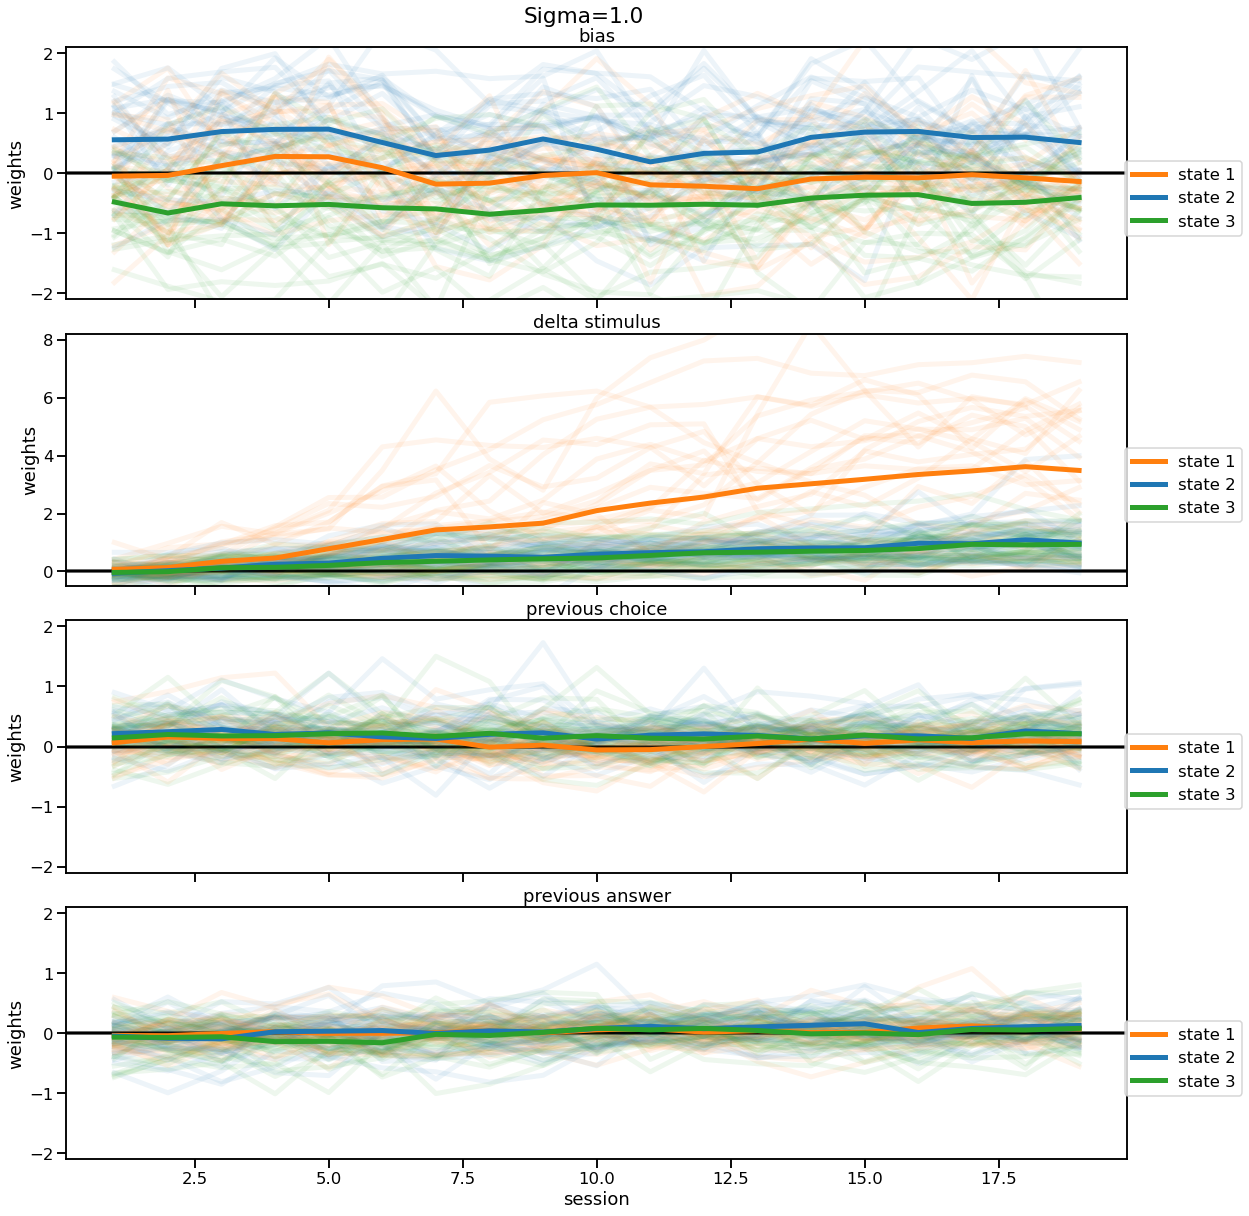

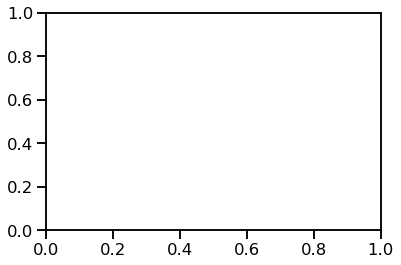

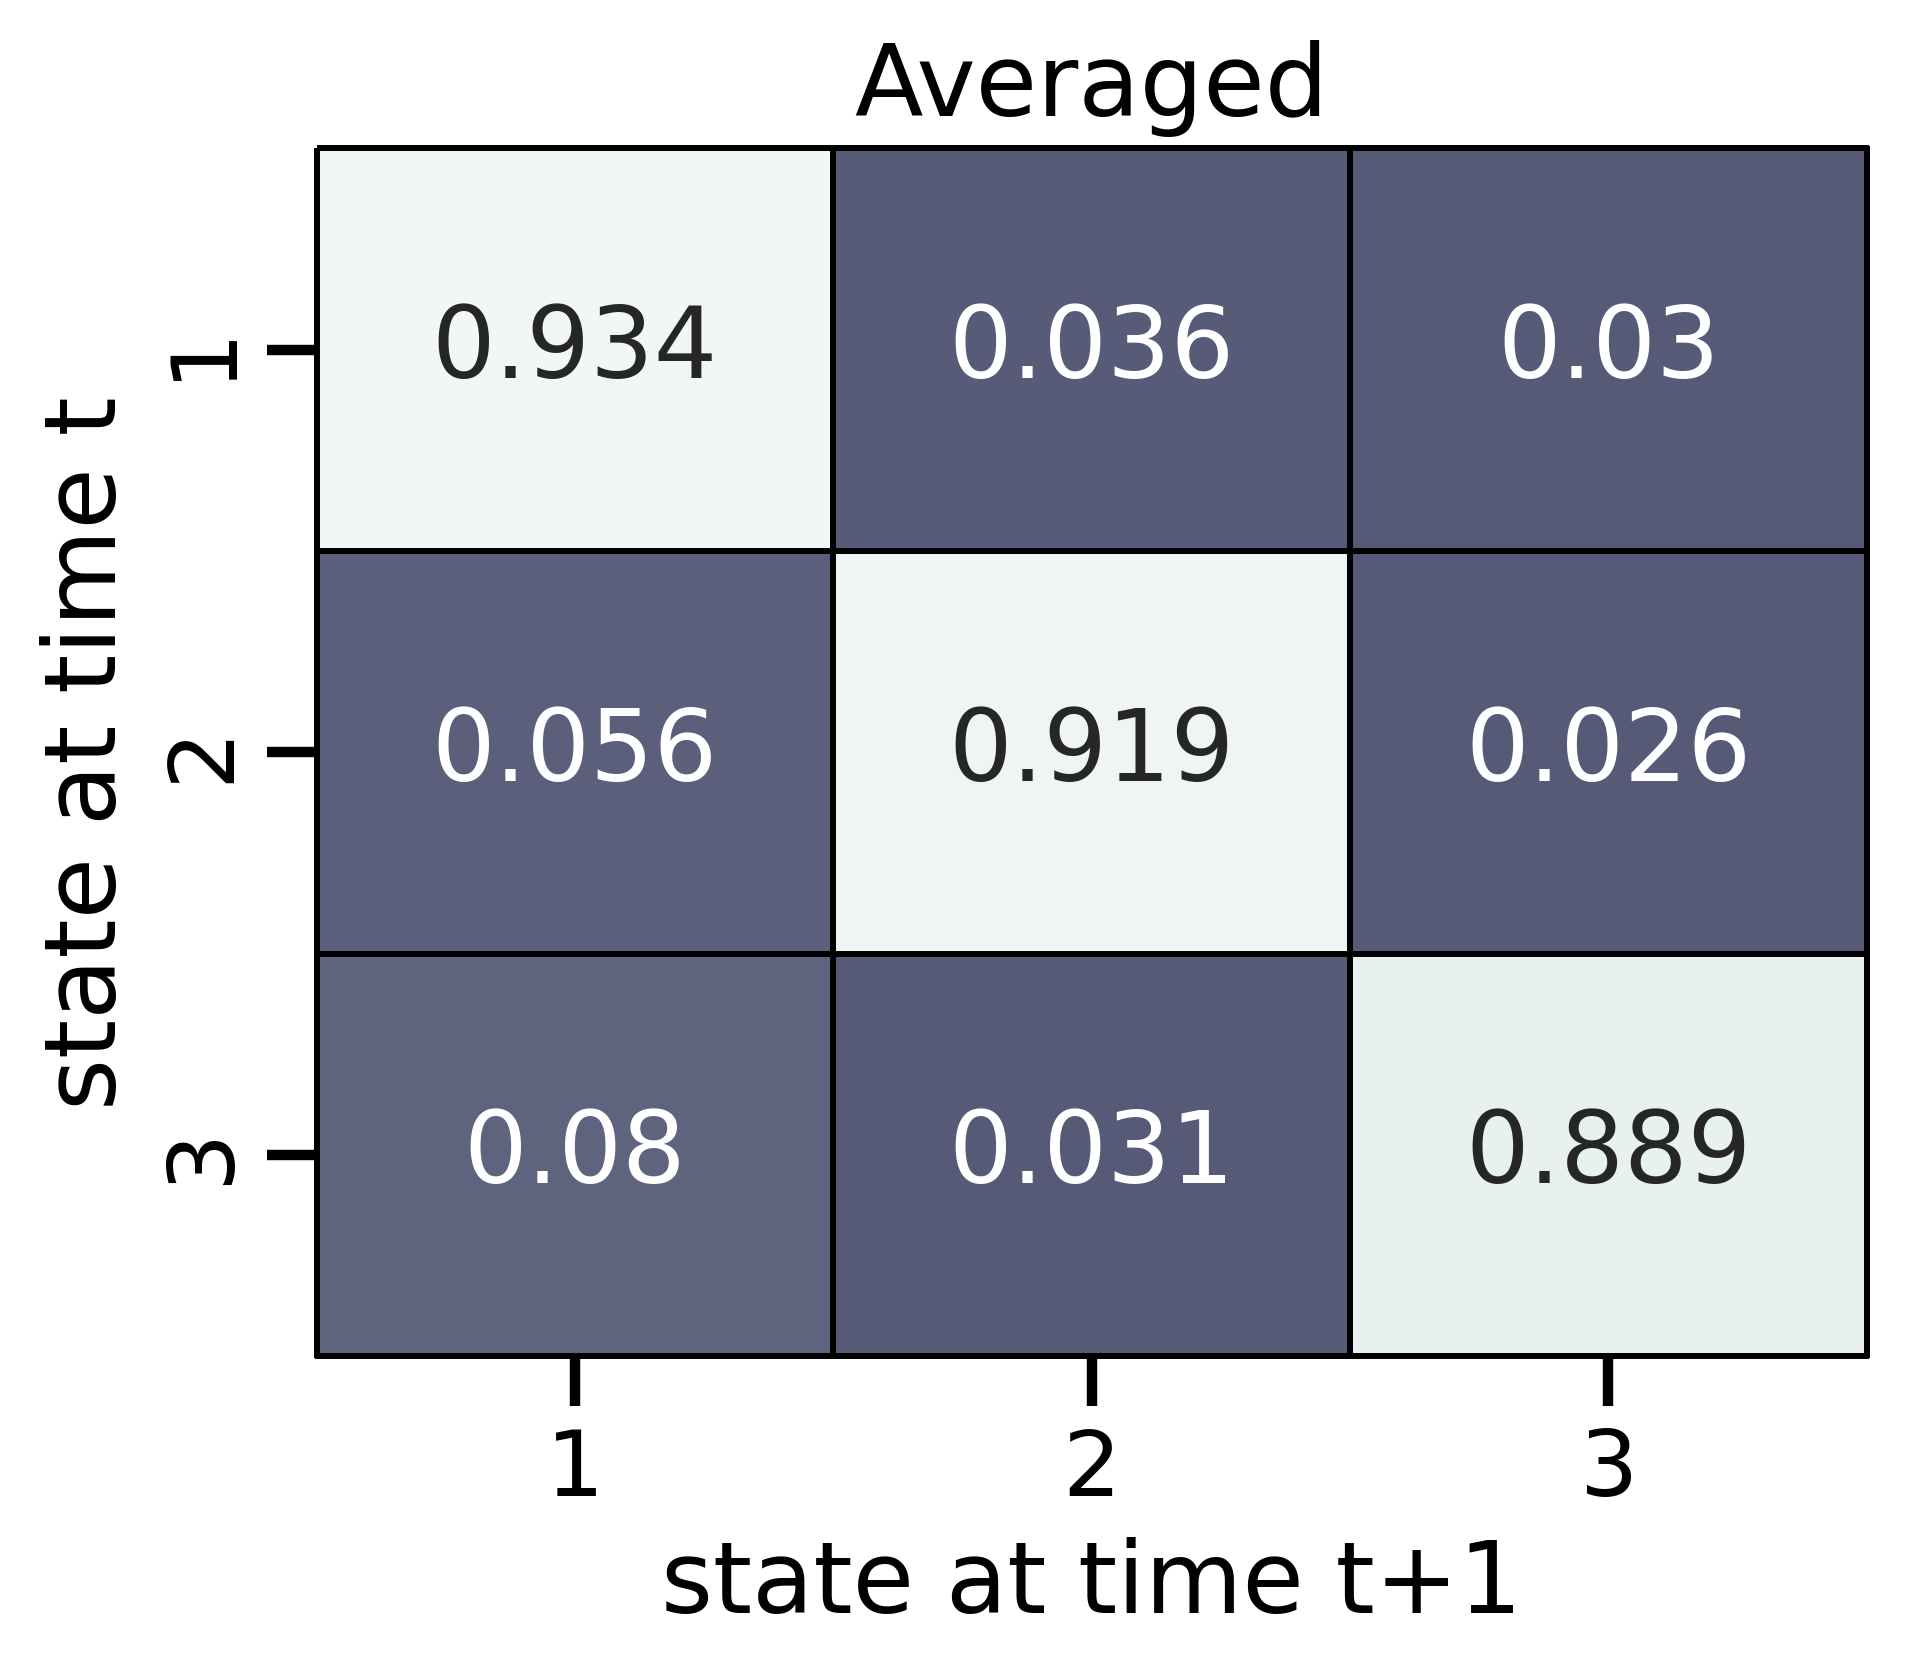

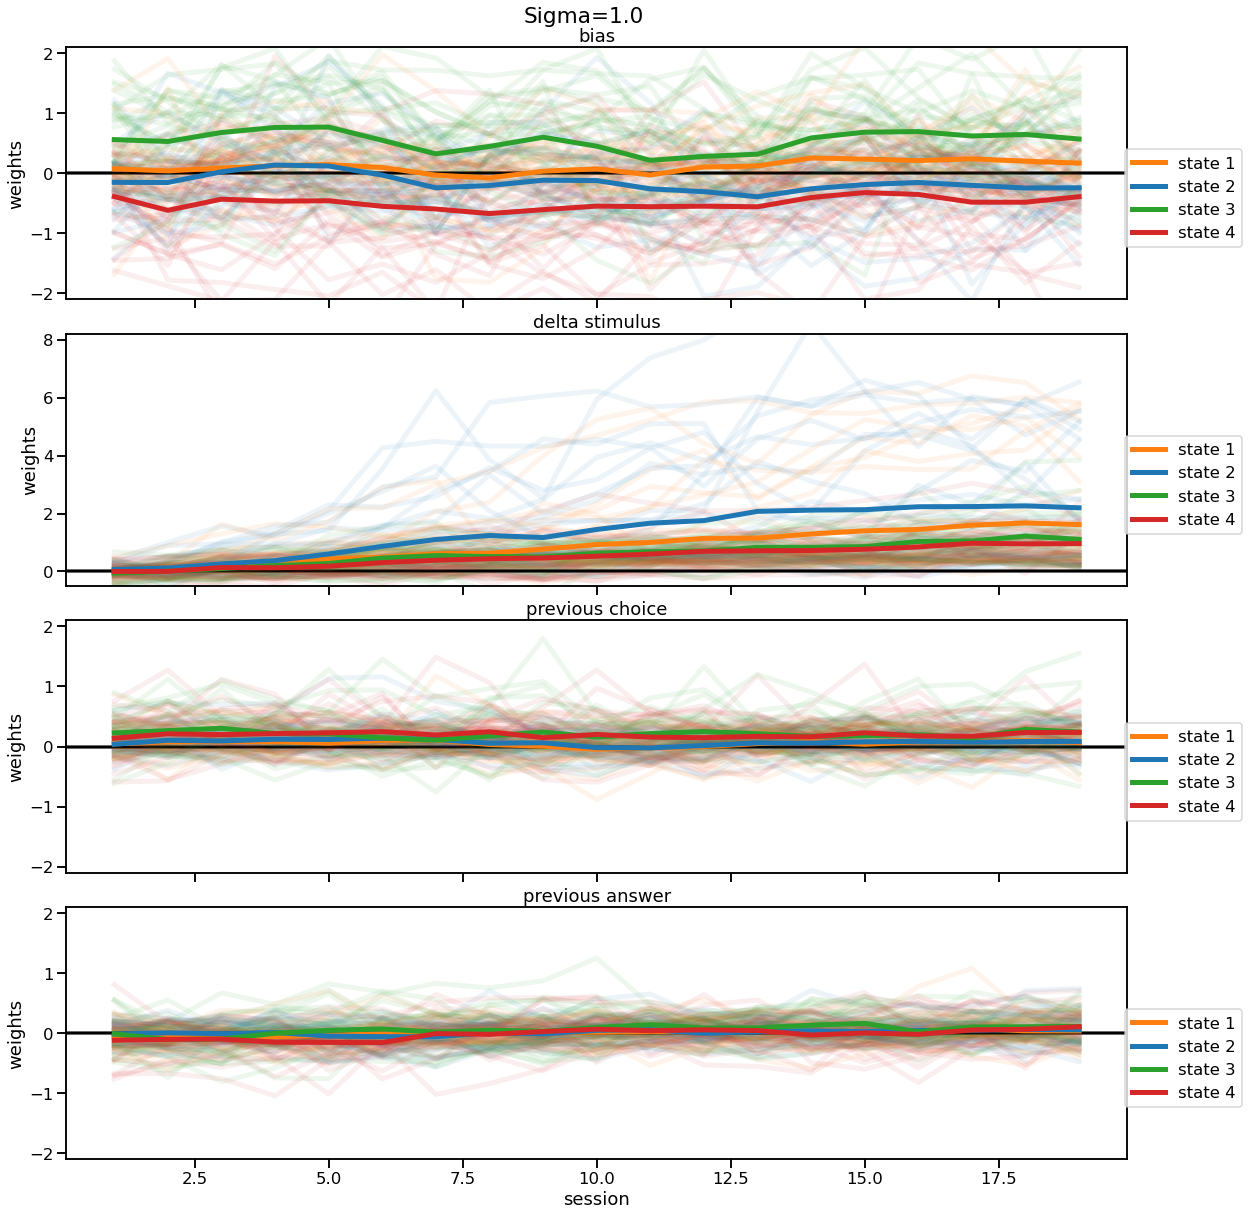

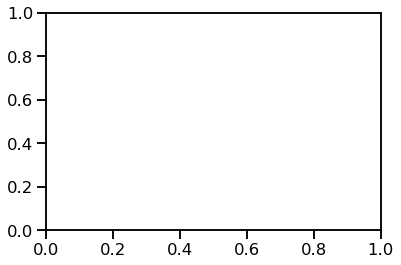

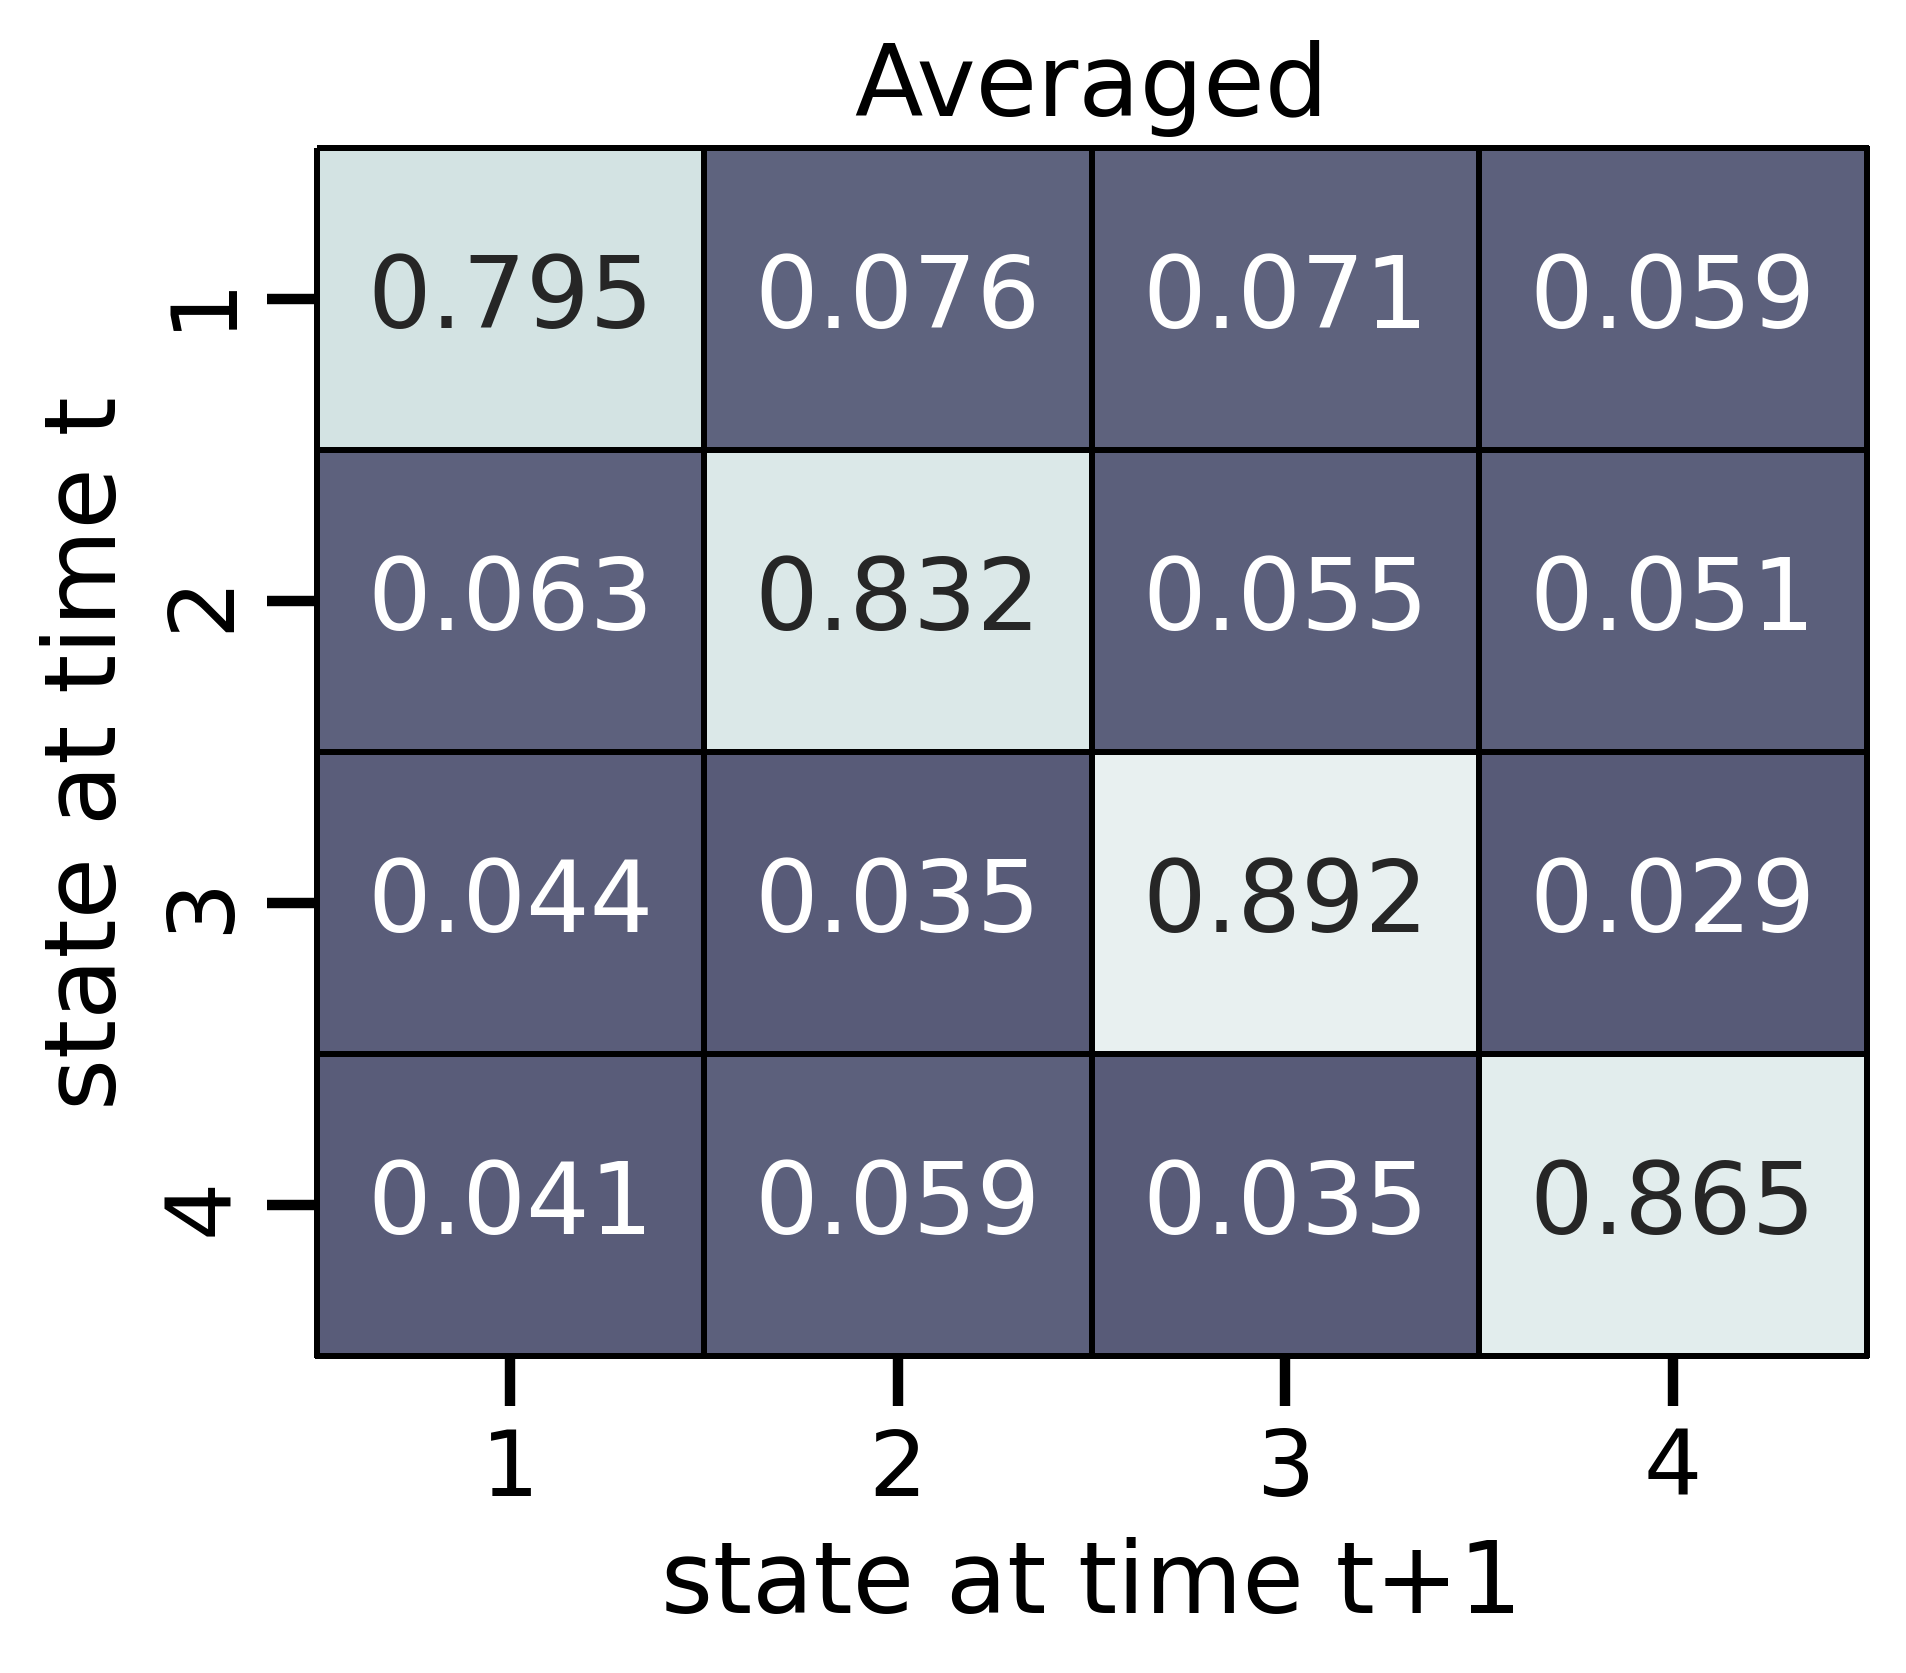

In [11]:
# Plotting weights and transition matrix averaged across all animals - first 70 sessions
maxSess = 20
Kplot = [3,4]
bestSigmaInd = 7
for K in Kplot:
    arr = np.ma.empty((maxSess, K, D, 2, len(subjectsAll)))
    arr.mask = True

    fig, axes = plt.subplots(D, 1,figsize=(16,4*D+1), sharex=True)
    fig.suptitle(f'Sigma={sigmaList[bestSigmaInd]}')
    fig.tight_layout()

    avgP = np.zeros((len(subjectsAll), K, K))
    avgW = []
            
    for idx in range(0,len(subjectsAll)):
        subject = subjectsAll[idx] 
        _, _, sessInd, _ = get_mouse_design(dfAll, subject, sessStop=sessStop, D=D)

        avgP[idx]=allP[idx,K-1][bestSigmaInd]
        avgW.append(allW[idx,K-1][bestSigmaInd, sessInd[:-1]]) 

        stop = min(avgW[idx].shape[0], maxSess)
        arr[:stop, :K, :D, :2, idx] = avgW[idx][:stop]
        plotting_weights_per_feature(-avgW[idx][:stop], [x for x in range (0, stop)], axes, yLim=[[-2.1,2.1],[-0.5,8.2],[-2.1,2.1],[-2.1,2.1]], colors=colorsStates, labels=myFeatures[D%2], linewidth=5, linestyle='-', alpha=0.08, legend=False, sortedStateInd=None)
        
    plotting_weights_per_feature(-arr.mean(axis=4), [x for x in range (0, maxSess)], axes, yLim=[[-2.1,2.1],[-0.5,8.2],[-2.1,2.1],[-2.1,2.1]], colors=colorsStates, labels=myFeatures[D%2], linewidth=5, linestyle='-', alpha=1, legend=True, sortedStateInd=None)

    # plotting transition matrix averaged across folds
    fig, axes = plt.subplots()
    plot_transition_matrix(np.mean(avgP, axis=0), title='Averaged', sortedStateInd=None) # not sorted                    